# TP4

Se quiere utilizar el conjunto de datos guardado en el archivo AirQualityUCI.csv para realizar un análisis de regresión. El algoritmo que se quiere utilizar requiere que los valores numéricos se encuentren en un rango entre 0 y 1. 

- Seleccionar un método de escalado y aplicarlo
- Justificar la elección

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_csv(r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\base-de-datos-ii\data\AirQualityUCI.csv")

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,10/03/2004,18.00.00,2,6,1360,150,11,9,1046,166,1056,113,1692,1268,13,6,48.0,9.0,0.0,7578.0
1,10/03/2004,19.00.00,2,1292,112,9,4,955,103,1174,92,1559,972,13,3,47,7.0,0.0,7255.0,NaN
2,10/03/2004,20.00.00,2,2,1402,88,9,0,939,131,1140,114,1555,1074,11,9,54.0,0.0,0.0,7502.0
3,10/03/2004,21.00.00,2,2,1376,80,9,2,948,172,1092,122,1584,1203,11,0,60.0,0.0,0.0,7867.0
4,10/03/2004,22.00.00,1,6,1272,51,6,5,836,131,1205,116,1490,1110,11,2,59.0,6.0,0.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3,1,1314,-200,13,5,1101,472,539,190,1374,1729,21,9,29.0,3.0,0.0,7568.0
9353,04/04/2005,11.00.00,2,4,1163,-200,11,4,1027,353,604,179,1264,1269,24,3,23.0,7.0,0.0,7119.0
9354,04/04/2005,12.00.00,2,4,1142,-200,12,4,1063,293,603,175,1241,1092,26,9,18.0,3.0,0.0,6406.0
9355,04/04/2005,13.00.00,2,1,1003,-200,9,5,961,235,702,156,1041,770,28,3,13.0,5.0,0.0,5139.0


In [3]:
columns_names = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19']
df_cols = df[columns_names].copy(deep = True)
color = []
df_cols_melt = df_cols.melt()
for i in range(len(df_cols_melt)):
    if df_cols_melt["variable"][i] == 'CO(GT)':
        x_color = "blue"
    if df_cols_melt["variable"][i] == 'PT08.S1(CO)':
        x_color = "orange"
    if df_cols_melt["variable"][i] == 'NMHC(GT)':
        x_color = "yellow"
    if df_cols_melt["variable"][i] == 'C6H6(GT)':
        x_color = "red"
    if df_cols_melt["variable"][i] == 'PT08.S2(NMHC)':
        x_color = "brown"
    if df_cols_melt["variable"][i] == 'NOx(GT)':
        x_color = "silver"
    if df_cols_melt["variable"][i] == 'PT08.S3(NOx)':
        x_color = "pink"
    if df_cols_melt["variable"][i] == 'NO2(GT)':
        x_color = "grey"
    if df_cols_melt["variable"][i] == 'PT08.S4(NO2)':
        x_color = "green"
    if df_cols_melt["variable"][i] == 'PT08.S5(O3)':
        x_color = "cyan"
    if df_cols_melt["variable"][i] == 'T':
        x_color = "black"
    if df_cols_melt["variable"][i] == 'RH':
        x_color = "lightpink"
    if df_cols_melt["variable"][i] == 'AH':
        x_color = "violet"
    if df_cols_melt["variable"][i] == 'Unnamed: 15':
        x_color = "teal"
    if df_cols_melt["variable"][i] == 'Unnamed: 16':
        x_color = "aqua"
    if df_cols_melt["variable"][i] == 'Unnamed: 17':
        x_color = "olive"
    if df_cols_melt["variable"][i] == 'Unnamed: 18':
        x_color = "lime"
    if df_cols_melt["variable"][i] == 'Unnamed: 19':
        x_color = "darkred"
        
    color.append(x_color)

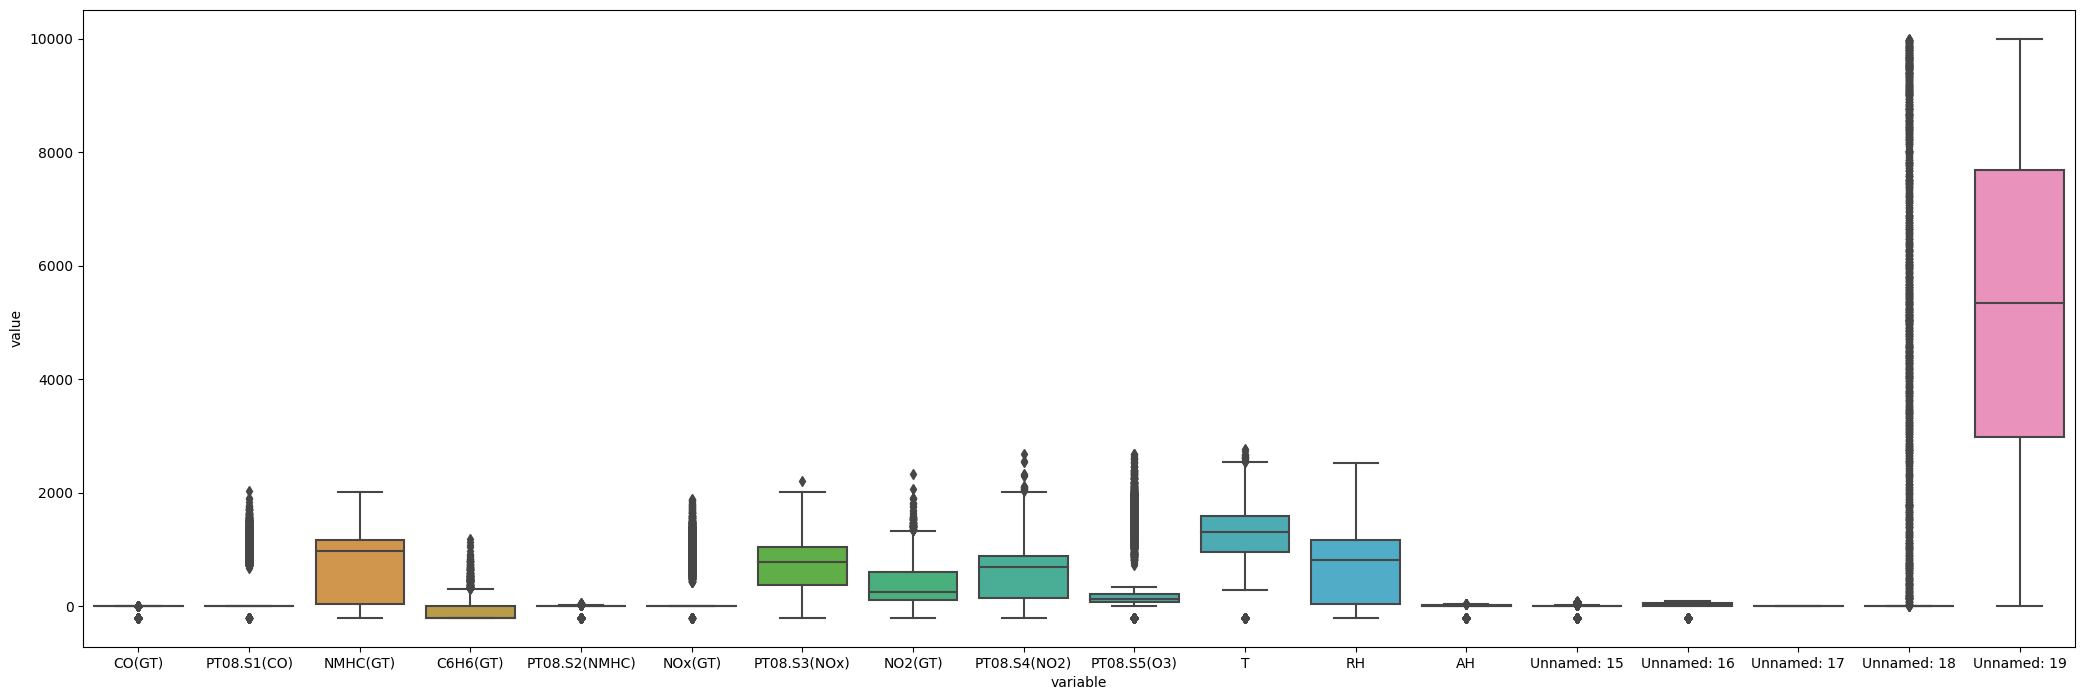

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols.melt())
ax=ax

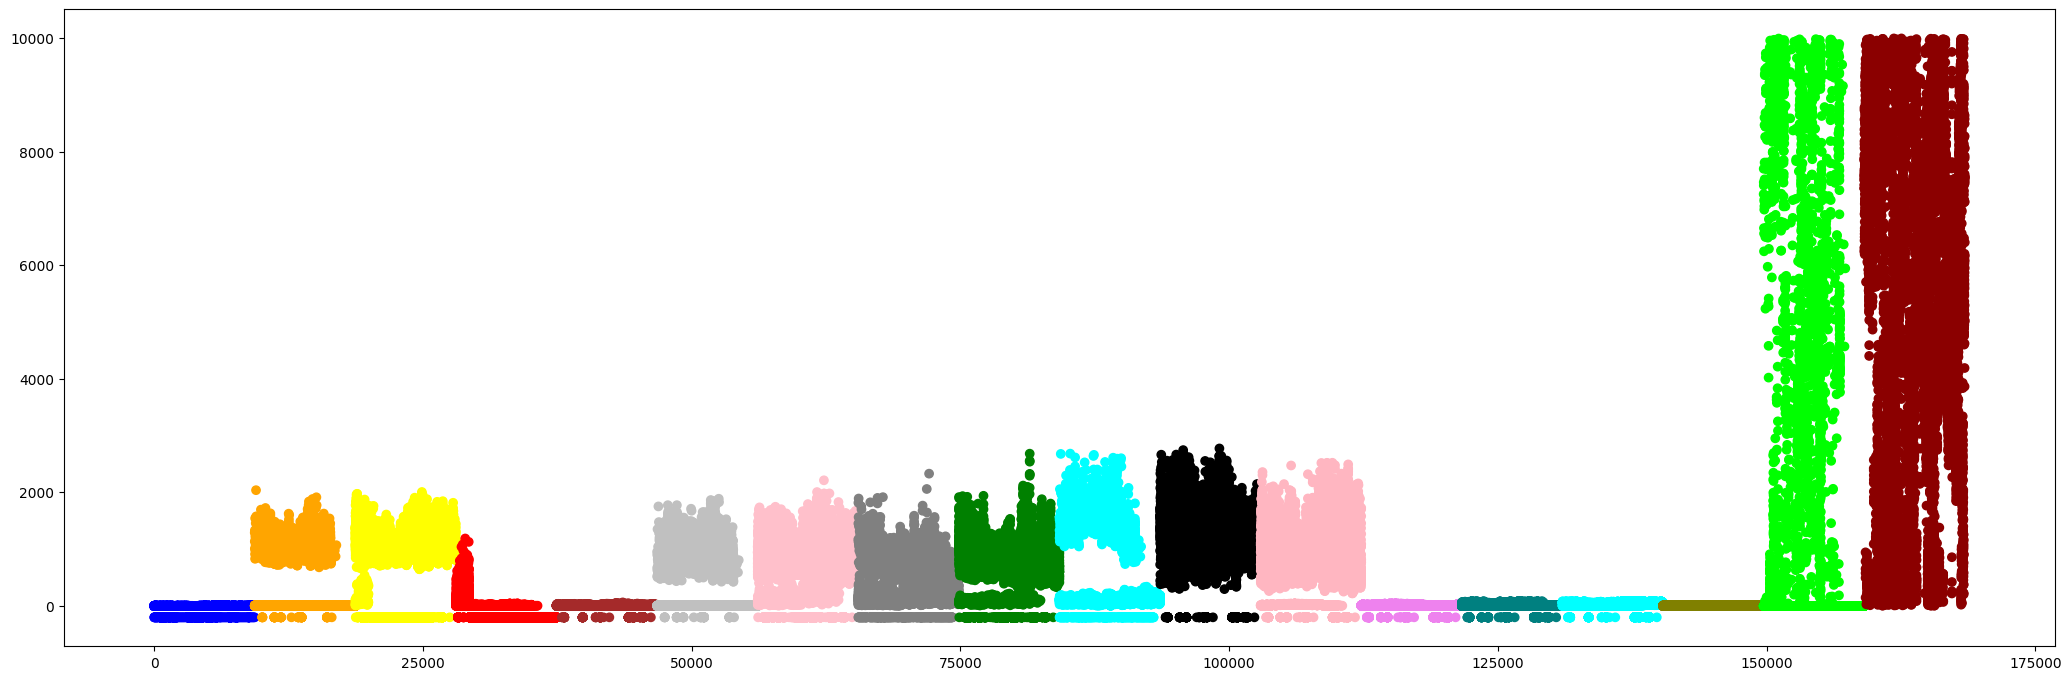

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols.melt().index,df_cols.melt()["value"], c=color)
plt.show()

Escalador de transformacion de Cuadril

<AxesSubplot: xlabel='variable', ylabel='value'>

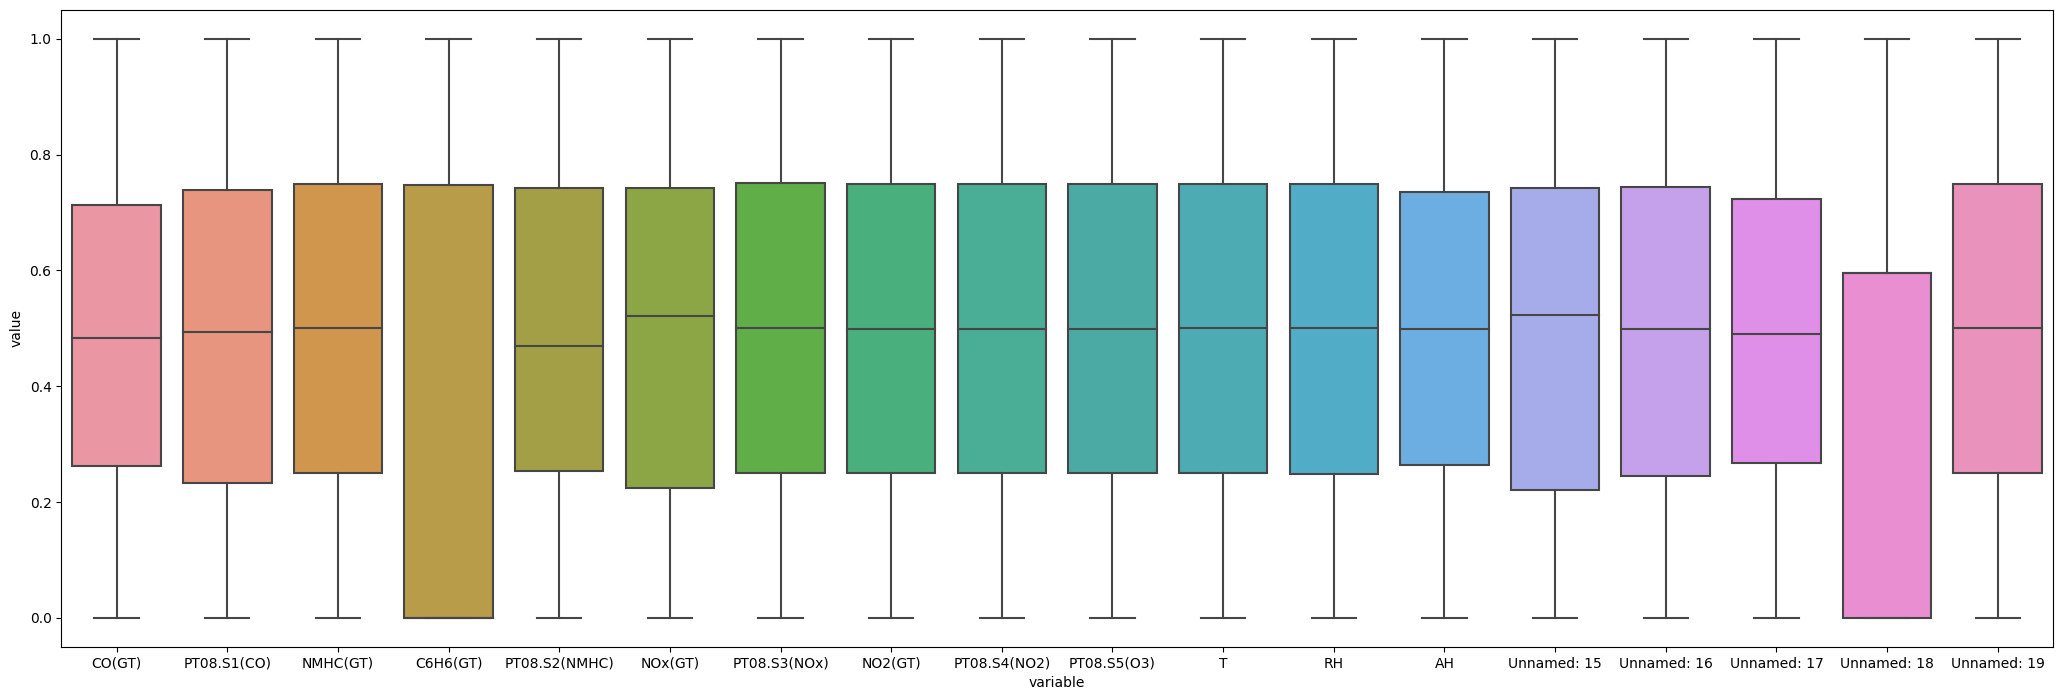

In [10]:
from sklearn.preprocessing import QuantileTransformer
# Crear modelo
scaler_tq = QuantileTransformer()
# Ajustar el modelo sobre las columnas
df_cols_tq = pd.DataFrame(scaler_tq.fit_transform(df_cols), columns = df_cols.columns)
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols_tq.melt())

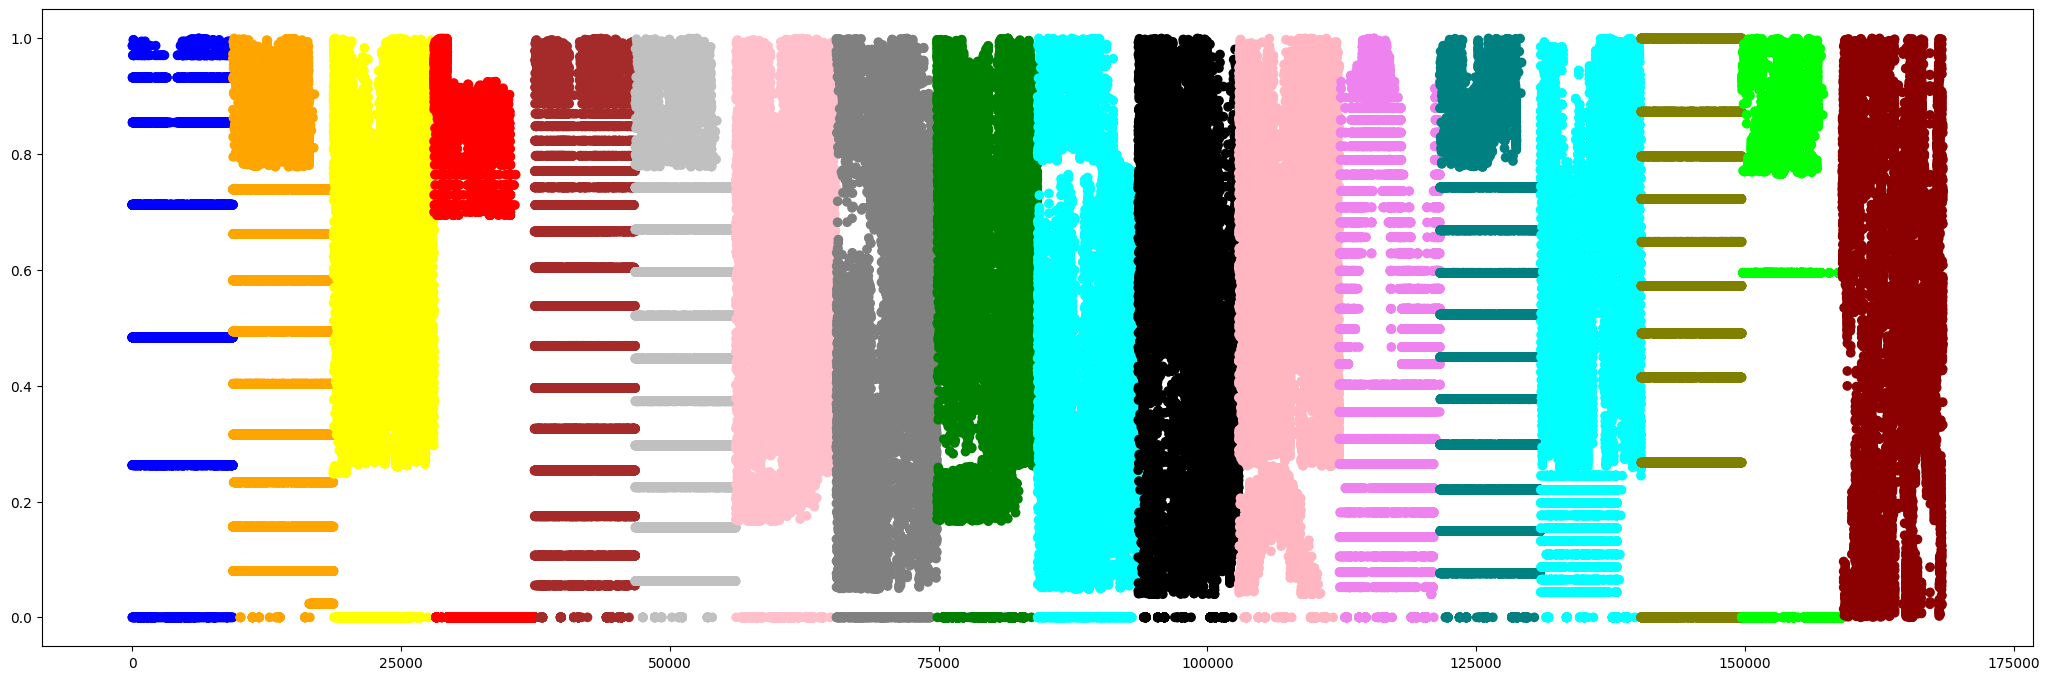

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols_tq.melt().index,df_cols_tq.melt()["value"], c=color)
plt.show()

Max - Min

<AxesSubplot: xlabel='variable', ylabel='value'>

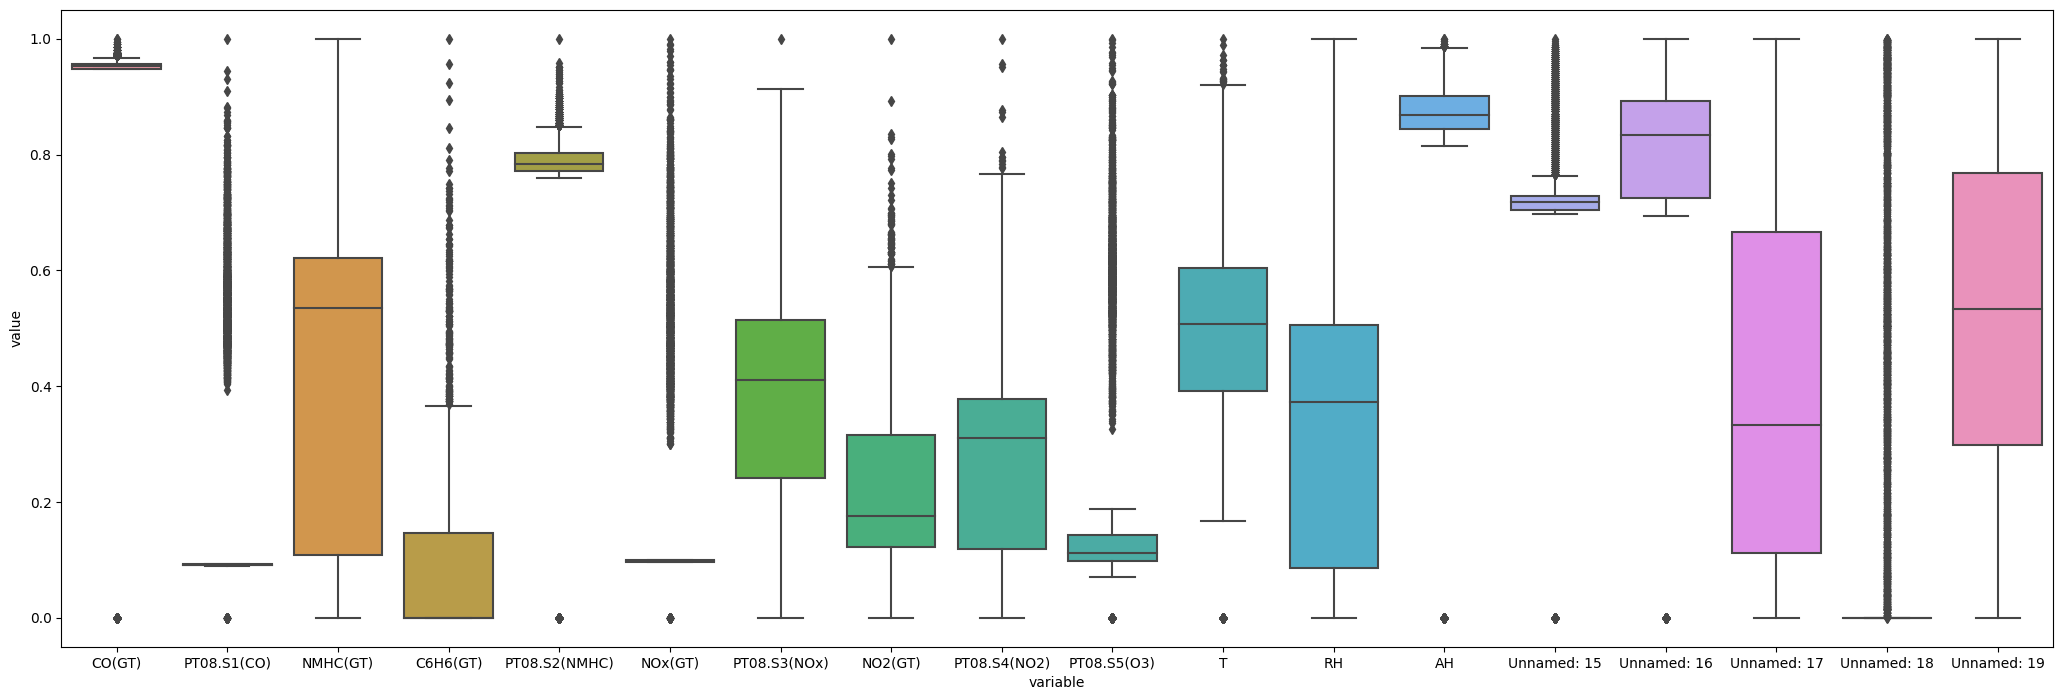

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Crear modelo
scaler_minmax = MinMaxScaler()
# Ajustar el modelo sobre las columnas
df_cols_maxmin = pd.DataFrame(scaler_minmax.fit_transform(df_cols), columns = df_cols.columns)
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols_maxmin.melt())

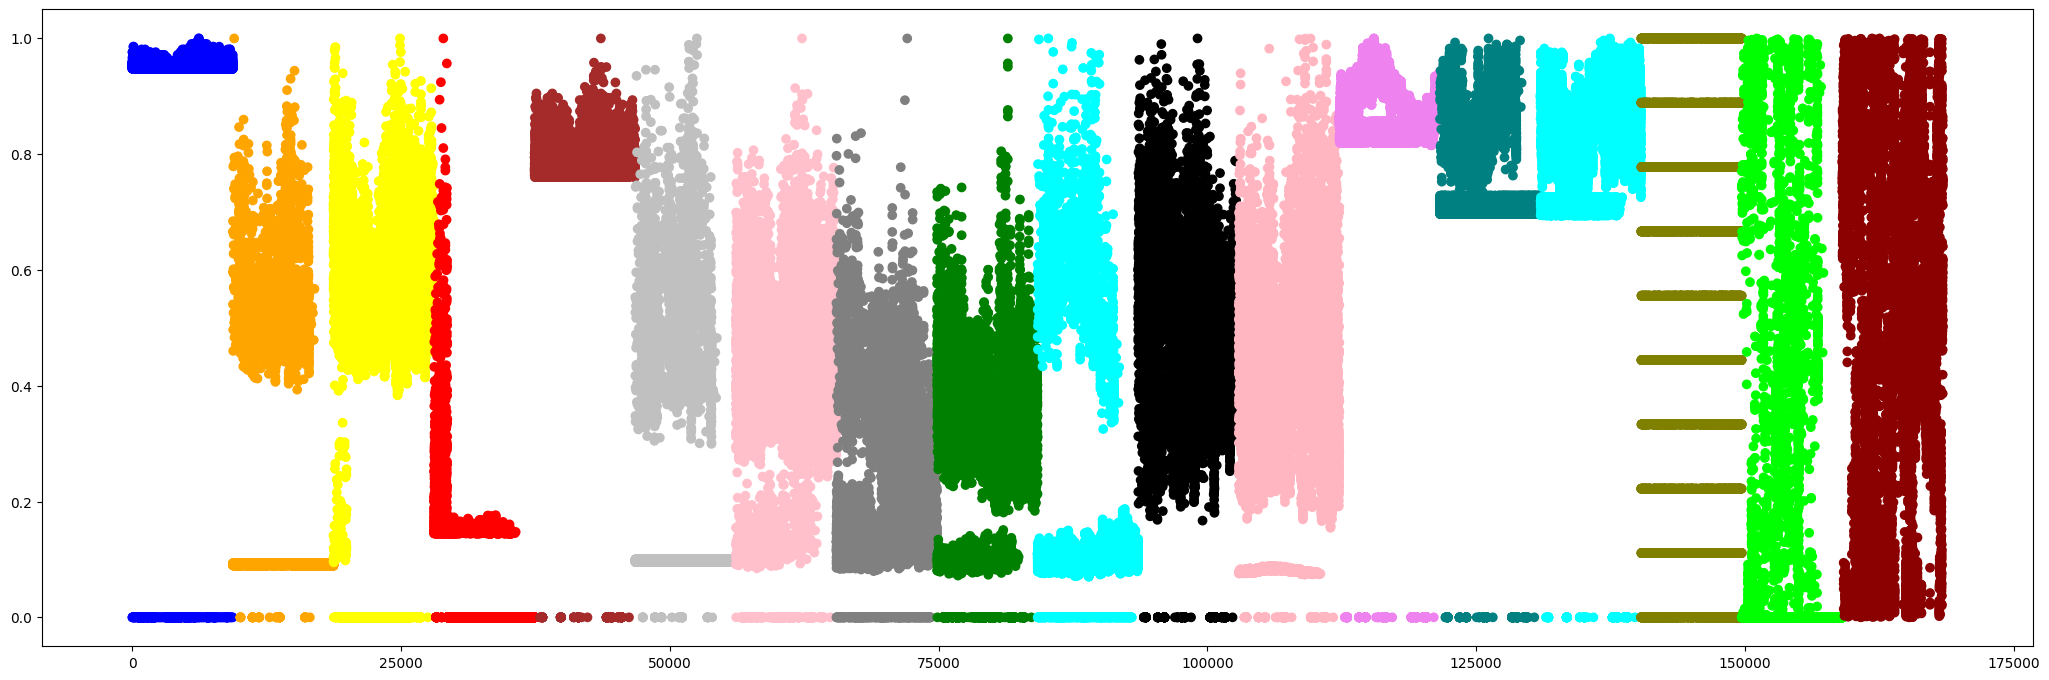

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols_maxmin.melt().index,df_cols_maxmin.melt()["value"], c=color)
plt.show()

Justificación
La opción más viable es el método de Max - Min, ya que, la tendencia de los datos que no son ni máximos ni mínimos se mantienen. (Se alteran justamente los valores extremos como máximos y mínimos)